US Visa Prediction Project
Life cycle of Machine learning Project

Understanding the Problem Statement

Data Collection

Exploratory data analysis

Data Cleaning

Data Pre-Processing

Model Training

Choose best model

1) Problem statement.

OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.

As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

In this project we are going to use the data given to build a Classification model:

This model is to check if Visa get approved or not based on the given dataset.

This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

2) Data Collection.

The Dataset is part of Office of Foreign Labor Certification (OFLC)

The data consists of 25480 Rows and 12 Columns

In [2]:
#Import Data and Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#Import the CSV Data as Pandas DataFrame
df = pd.read_csv(r"Visadataset.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

In [6]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [24]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [14]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64
---------------------------
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
---------------------------
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
---------------------------
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
---------------------------
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
---------------------------
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.90345

Insights

case_id have unique vlaues for each column which can be dropped as it it of no importance

continent column is highly biased towards asia. hence we can combine other categories to form a single category.

unit_of_wage seems to be an important column as most of them are yearly contracts.

#Univariate Analysis

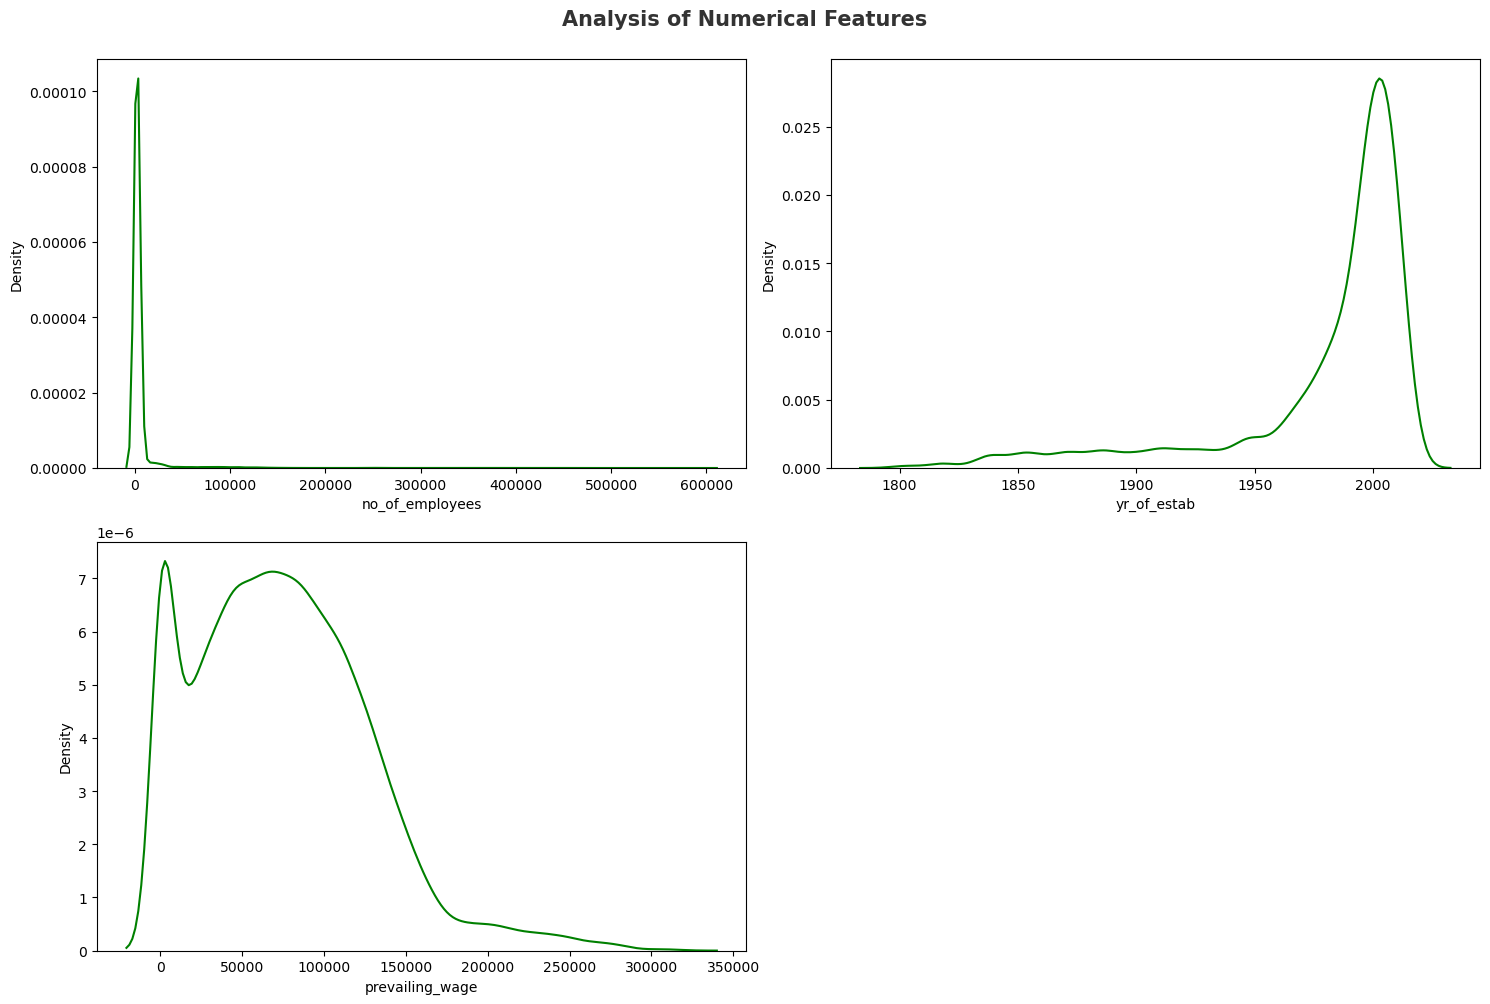

In [10]:
#Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Analysis of Numerical Features', fontsize=15, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]],color='green')
    plt.xlabel(numeric_features[i])
plt.tight_layout()


Insights

no_of_employees column looks more skewed but it may be because of outliers.

privailing-wage is a right-skewed distribution.

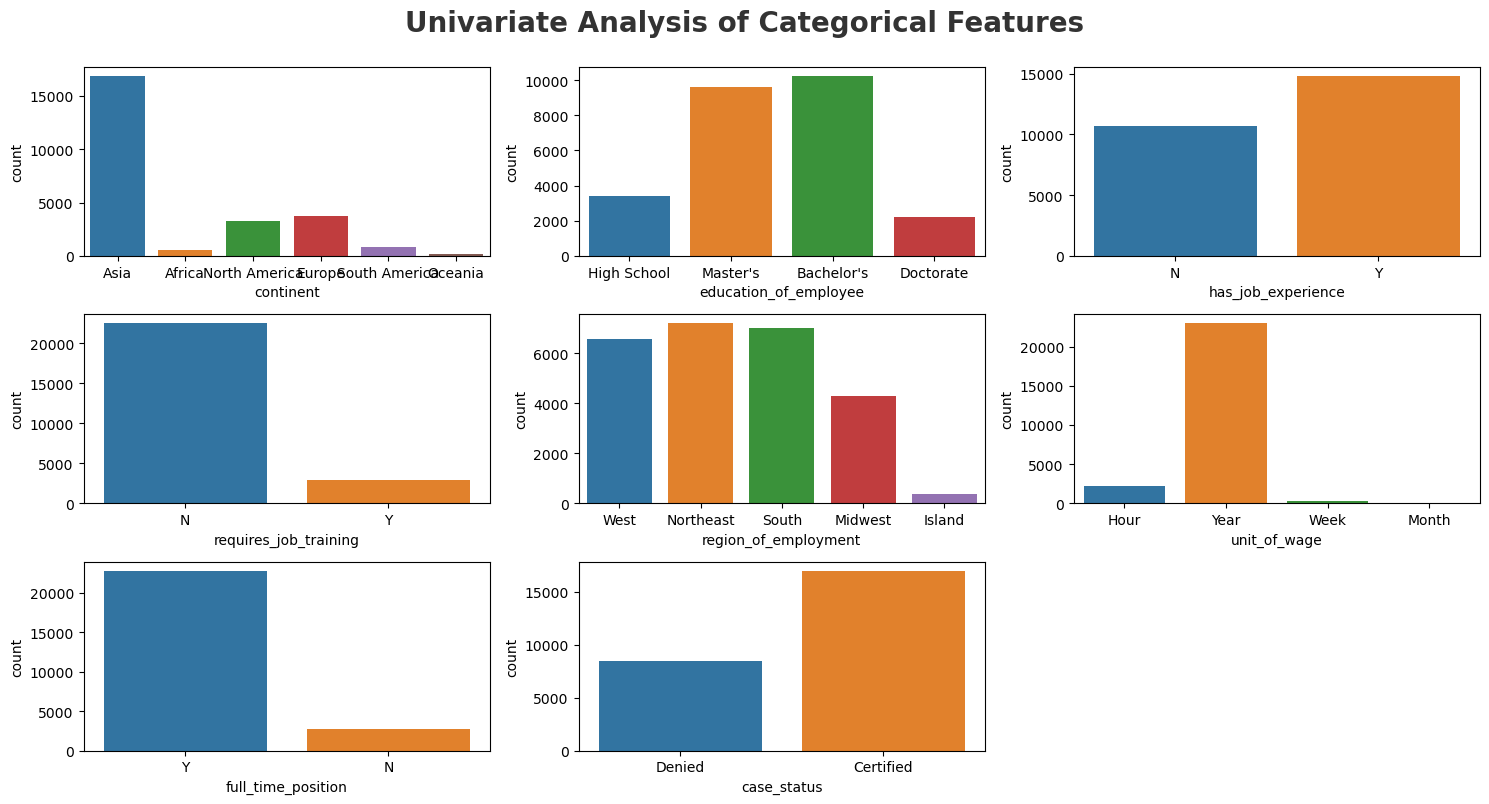

In [25]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

Insights

requires_job_training, unit_of_wage, full_time_position and continents coulmns have signle category dominating.

In rest of the columns are balanced.

#Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis : The Feature is independent of target column (No-Correlation)

Alternative Hypothesis: The Feature and Target column are not independent (Correalted)




In [26]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


#Insight 

Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [33]:
#Check Multicollinearity for Numerical features

import pandas as pd
import numpy as np
from scipy import stats


results = []

for i in range(len(numeric_features)):
    for j in range(i + 1, len(numeric_features)):
        feature1 = numeric_features[i]
        feature2 = numeric_features[j]
        r = df[feature1].corr(df[feature2])
        n = len(df)  # Number of observations
            # Calculate the t-statistic for the correlation
        t_stat = r * np.sqrt((n - 2) / (1 - r**2))
        # Calculate the p-value
        p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n - 2))

        if p_value < 0.05:
            results.append((f"{feature1} & {feature2}" ,'Reject Null Hypothesis'))
        else:
            results.append((f"{feature1} & {feature2}", 'Fail to Reject Null Hypothesis'))
            
print(results)








[('no_of_employees & yr_of_estab', 'Reject Null Hypothesis'), ('no_of_employees & prevailing_wage', 'Fail to Reject Null Hypothesis'), ('yr_of_estab & prevailing_wage', 'Reject Null Hypothesis')]


Looks like No_of_employees and Prevailing_wage are colinear. 

In [34]:
#checking null values

df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

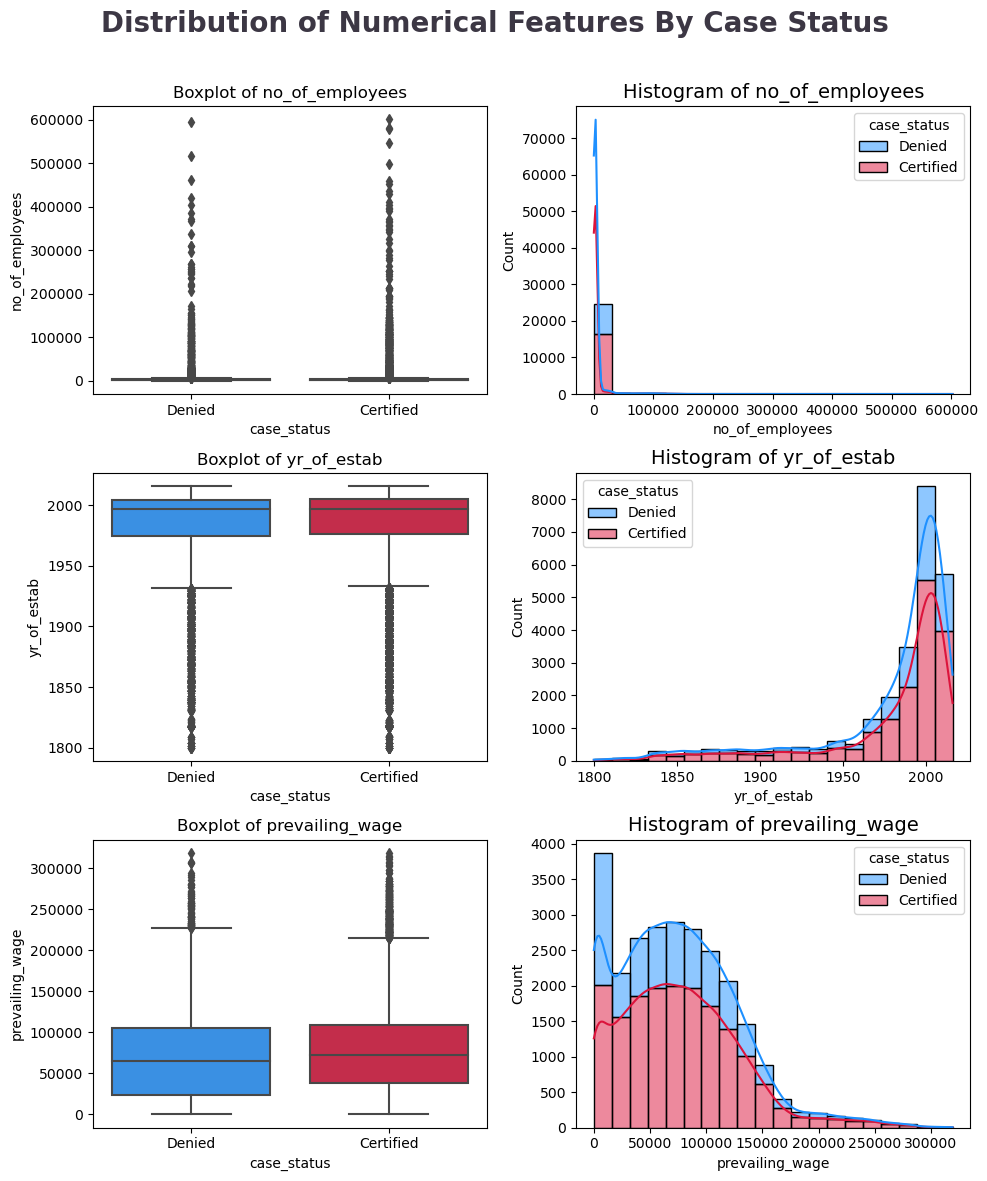

In [35]:
#Distribution of Numerical Features By Case Status
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numeric_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

-No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.

-yr_of_estab is left skewed and some outliers below the lower bound of Box plot.

-prevailing_wage is right skewed with outliers above upper bound of box plot.


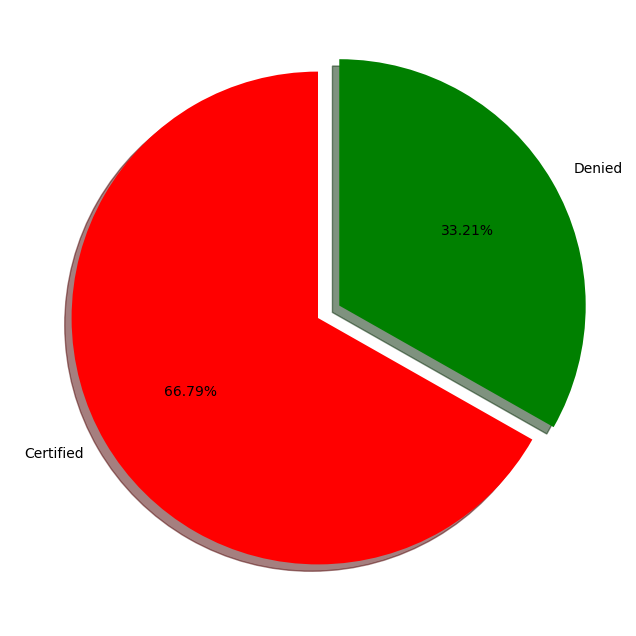

In [36]:
#Visualize the Target Feature
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['red','green']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

From the chart it is seen that the Target Variable is Imbalanced

In [37]:
#applicant Continent Vs Visa status

#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
continent     case_status             
Africa        Certified      72.050817
              Denied         27.949183
Asia          Certified      65.310480
              Denied         34.689520
Europe        Certified      79.233655
              Denied         20.766345
North America Certified      61.877278
              Denied         38.122722
Oceania       Certified      63.541667
              Denied         36.458333
South America Certified      57.863850
              Denied         42.136150

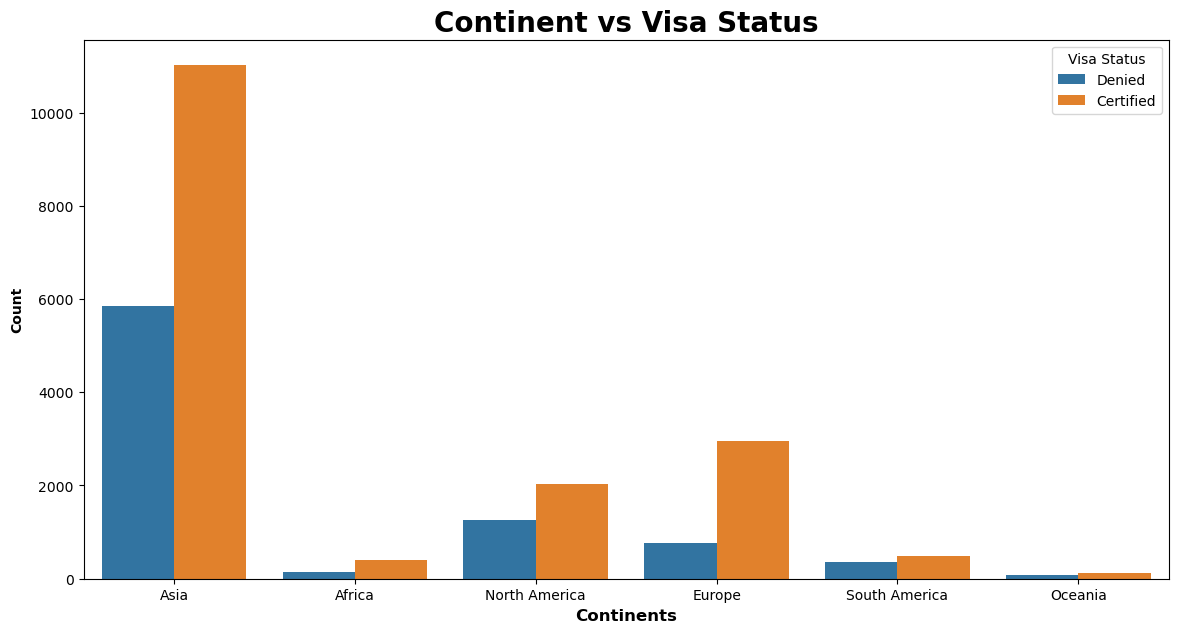

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df)
plt.title("Continent vs Visa Status", weight="bold",fontsize=20)
plt.ylabel("Count", weight="bold", fontsize=10)
plt.xlabel("Continents", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

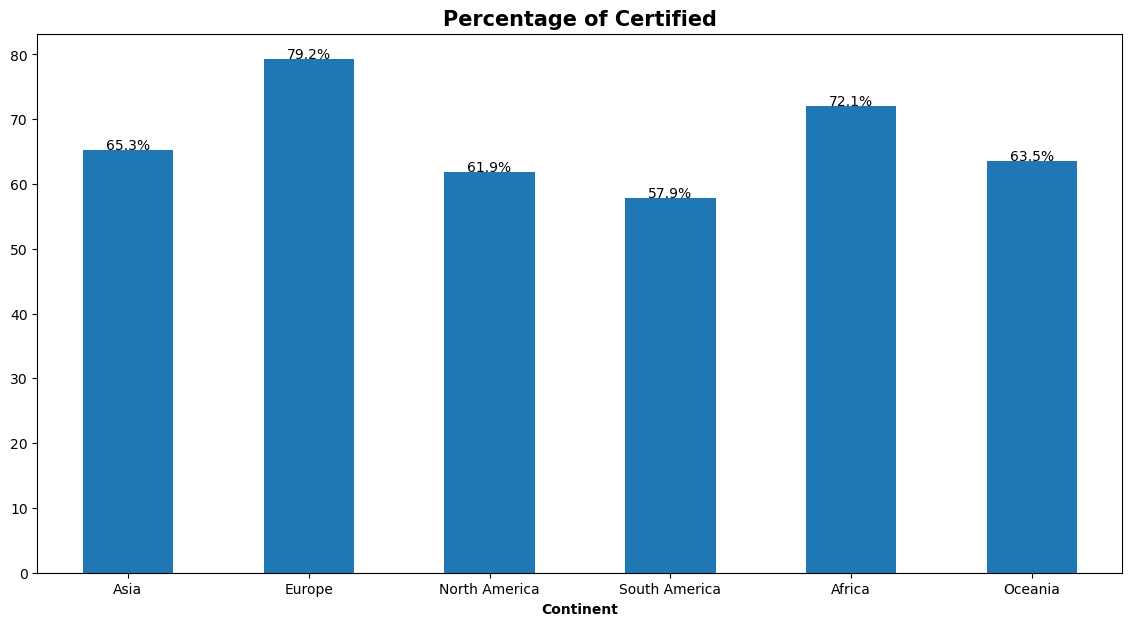

In [43]:
plt.figure(figsize=[14,7])

(100*df[df["case_status"].isin(['Certified'])]['continent'].value_counts()/df['continent'].value_counts()).plot(
    kind='bar',stacked=True )
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df[df["case_status"].isin(['Certified'])]['continent'].value_counts()/df['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

As per the Chart Asia applicants applied more than other continents.

43% of Certified applications are from Asia.

This is followed by Europe with 11% of Certified applications.

Highest chance of getting certified if you are from Europe and followed by Africa